<a href="https://colab.research.google.com/github/Giovannacm/machine-learning/blob/main/LogisticRegression_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
def cost(y_true, y_predicted):
  cost = (-1 / len(y_true)) * np.sum(y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted))
  return cost

In [3]:
def gradient_descent(X, y, max_iterations=3000, learning_rate=1e-4, stopping_threshold=1e-6):
  m, n = X.shape

  X = np.c_[np.ones((m, 1)), X]
  w = np.random.randn(n + 1, 1)
  
  previous_cost = None

  for iteration in range(max_iterations):
    y_predicted = 1 / (1 + np.exp(-X.dot(w)))
    
    current_cost = cost(y, y_predicted)
    if stopping_threshold and previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
      print('stopping_threshold reached in iteration', iteration)
      break
    previous_cost = current_cost

    w = w - learning_rate * X.T.dot(y_predicted - y) / m

  return w

In [4]:
X = np.array([[3.78], [2.44], [2.09], [0.14], [1.72], [1.65], [4.92], [4.37], [4.96], [4.52], [3.69], [5.88]])
y = np.array([[0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1]])

[[-0.32358607]
 [ 0.28145327]]


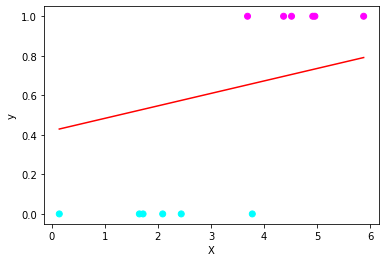

In [5]:
estimated_weights = gradient_descent(X, y, max_iterations=5000, learning_rate=1e-3)
print(estimated_weights)

y_pred = 1 / (1 + np.exp(-(X.dot(estimated_weights[1:, 0]) + estimated_weights[0, 0])))

plt.scatter(X, y, c=y, cmap='cool')
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [6]:
y_pred

array([0.67706305, 0.58980514, 0.56577933, 0.42942865, 0.54004245,
       0.5351449 , 0.74291293, 0.71225569, 0.74505727, 0.72083006,
       0.67149985, 0.79106536])

In [9]:
center1 = (5, 8)
center2 = (8, 5)
distance = 2

x1_1 = np.random.uniform(center1[0], center1[0] + distance, size=(50,1))
x1_2 = np.random.normal(center1[1], distance, size=(50,1)) 
x1 = np.concatenate((x1_1, x1_2), axis=1)
y1 = np.zeros((50,1))

x2_1 = np.random.uniform(center2[0], center2[0] + distance, size=(50,1))
x2_2 = np.random.normal(center2[1], distance, size=(50,1))
x2 = np.concatenate((x2_1, x2_2), axis=1)
y2 = np.ones((50,1))

X = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

[[ 2.36586249]
 [ 0.61411202]
 [-1.07155846]]


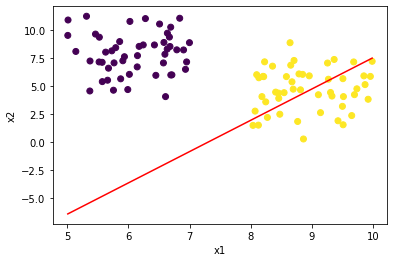

In [10]:
estimated_weights = gradient_descent(X, y, max_iterations=5000, learning_rate=1e-3)
print(estimated_weights)

y_pred = X.dot(estimated_weights[1:, 0]) + estimated_weights[0, 0]

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([min(X[:, 0]), max(X[:, 0])], [min(y_pred), max(y_pred)], color='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Teste com biblioteca

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score 0.9166666666666666
weights [[1.39510954]] bias: [-4.83670029]


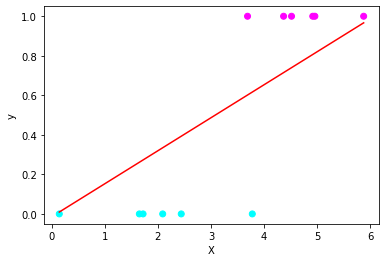

In [7]:
reg = LogisticRegression().fit(X, y)
print('score', reg.score(X, y))
print('weights', reg.coef_, 'bias:', reg.intercept_ )

y_pred = 1 / (1 + np.exp(-(X.dot(reg.coef_) + reg.intercept_)))

plt.scatter(X, y, c=y, cmap='cool')
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [8]:
y_pred

array([[0.60749955],
       [0.19268876],
       [0.12775886],
       [0.00955221],
       [0.08038616],
       [0.07345637],
       [0.88362743],
       [0.77901378],
       [0.88924409],
       [0.81293497],
       [0.57719129],
       [0.96664243]])

score 1.0
weights [[ 2.69712143 -0.57488915]] bias: [-16.57978953]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


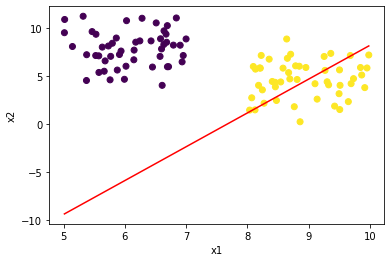

In [11]:
reg = LogisticRegression().fit(X, y)
print('score', reg.score(X, y))
print('weights', reg.coef_, 'bias:', reg.intercept_ )

y_pred = reg.predict(X)
x2 = X.dot(reg.coef_.T) + reg.intercept_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([min(X[:, 0]), max(X[:, 0])], [min(x2), max(x2)], color='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()